
# <span style="color:rgb(213,80,0)">Generate Table 2 and Figure 2 of the paper "Choice of trimming proportion and number of clusters in robust clustering based on trimming"  </span>

### Luis A. García\-Escudero, Christian Hennig, Agustin Mayo Iscar,  Gianluca Morelli, Marco Riani,

Remark: we assume that you have FSDA installed, at least version 8.7.7.6.


In order to install FSDA, in the Home menu click on Add\-Ons and search for FSDA.

## Simulated data

In [1]:
% Load the GHMMR dataset and make sure that FSDA installed
try
    load GHMMR.mat
catch
    error('FSDA:missingFSDA','FSDA toolbox is not installed from Get Add-Ons')
end

Y = table2array(GHMMR(:,1:2));

In [2]:
k = 1:8; % number of groups to test
alphaTrim = 0.00:0.025:0.2; % level of trimming to test
cc = 50; % restriction factor
nsamp =  1000; % number of  subsets
nsimul = 100; % number of replicates
crit = 0.1; % p-value threshold

bands=struct;
bands.nsimul=nsimul;
bands.outliersFromUniform = 1;
bands.crit=crit;
[outCTL] = ctlcurves(Y(:,1:end), 'alpha',alphaTrim,'kk',k,'bands',bands, 'restrfactor',cc, 'nsamp',nsamp,'plots',0);

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
Bands k=1
in 10000 replicates in the interval [-14.3878--46.2042]
Number of values which was possible to generate is equal to 84
Please modify the type of outliers using option 'typeout' 
or increase input option 'alpha'
The value of alpha now is 0.001
Outliers have been generated according to uniform
Bands k=2
Bands k=3
Bands k=4
Bands k=5
Bands k=6
Bands k=7
Bands k=8

In [3]:
disp('Show the Values of p_{k,α}')

Show the Values of p_{k,α}

In [4]:
disp(outCTL.LRTpval)

                  alpha=0    alpha=0.025    alpha=0.05    alpha=0.075    alpha=0.1    alpha=0.125    alpha=0.15    alpha=0.175    alpha=0.2
                  _______    ___________    __________    ___________    _________    ___________    __________    ___________    _________
    k=1_vs_k=2        0            0              0             0             0             0              0             0             0   
    k=2_vs_k=3        0            0              0             0             0             0              0             0             0   
    k=3_vs_k=4        0            0              0             0             0             0              0             0             0   
    k=4_vs_k=5        0            0              0             0          0.79             1              1             1          0.99   
    k=5_vs_k=6        0            0              0             1             1             1              1             1          0.99   
    k=6_vs_k=7     0


List the tentative solutions automatically found


In [5]:
[~,index]=unique(outCTL.LRTtentSolt.k,'stable');
Solt=outCTL.LRTtentSolt(index,:);
Sol=outCTL.LRTtentSol(index,:);
SolIdx=outCTL.LRTtentSolIDX(:,index);
disp('Show the list of tentative solutions automatically extracted')

Show the list of tentative solutions automatically extracted

In [6]:
disp(Solt(:,1:3))

            index    k    alpha
            _____    _    _____
    Sol1      1      6        0
    Sol3      3      5    0.075
    Sol4      4      4      0.1



### Show the solutions automatically found (Figure 2)

Remark: note that in the live version the legends are clickable and it is possible to hide/show the single groups



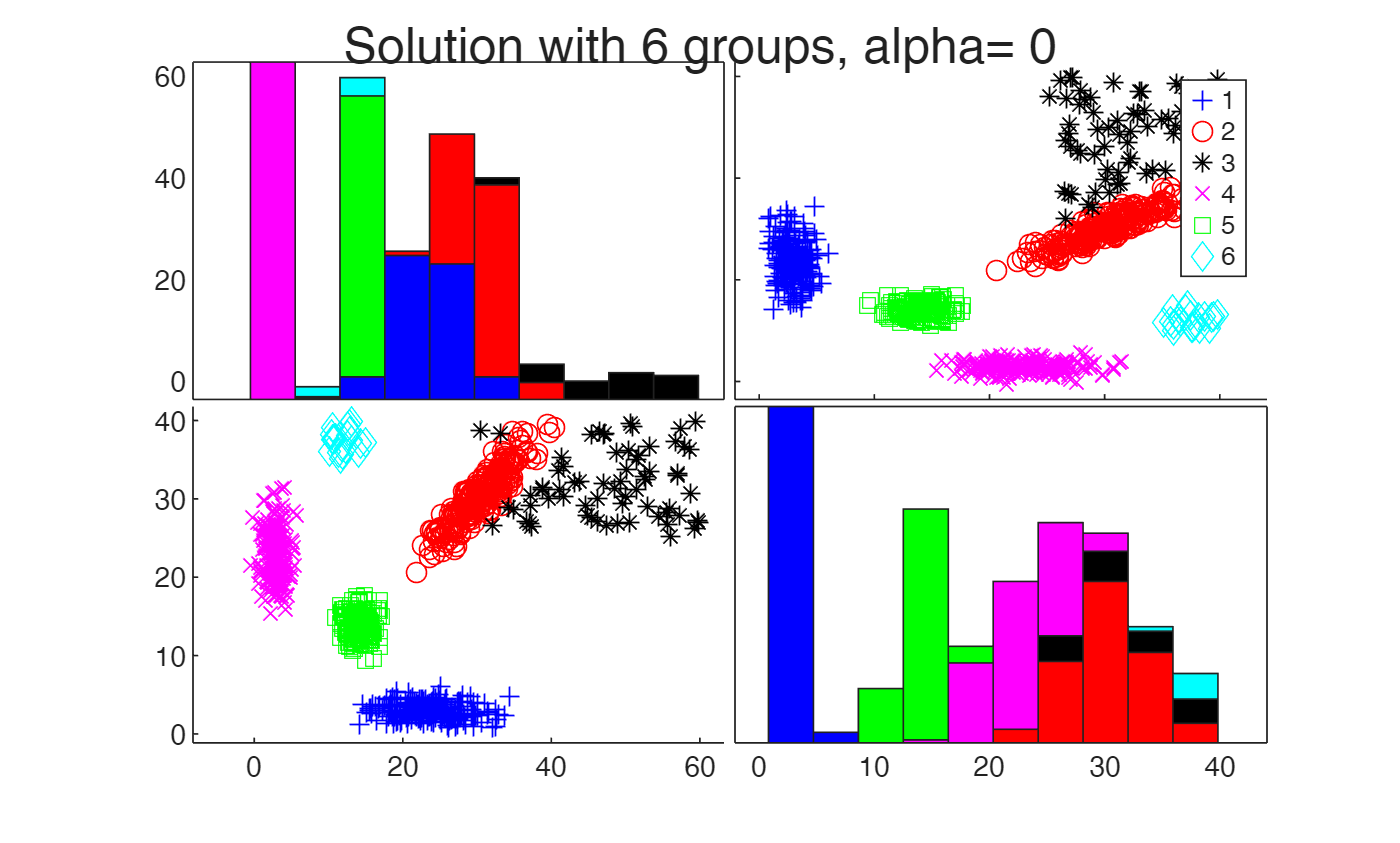


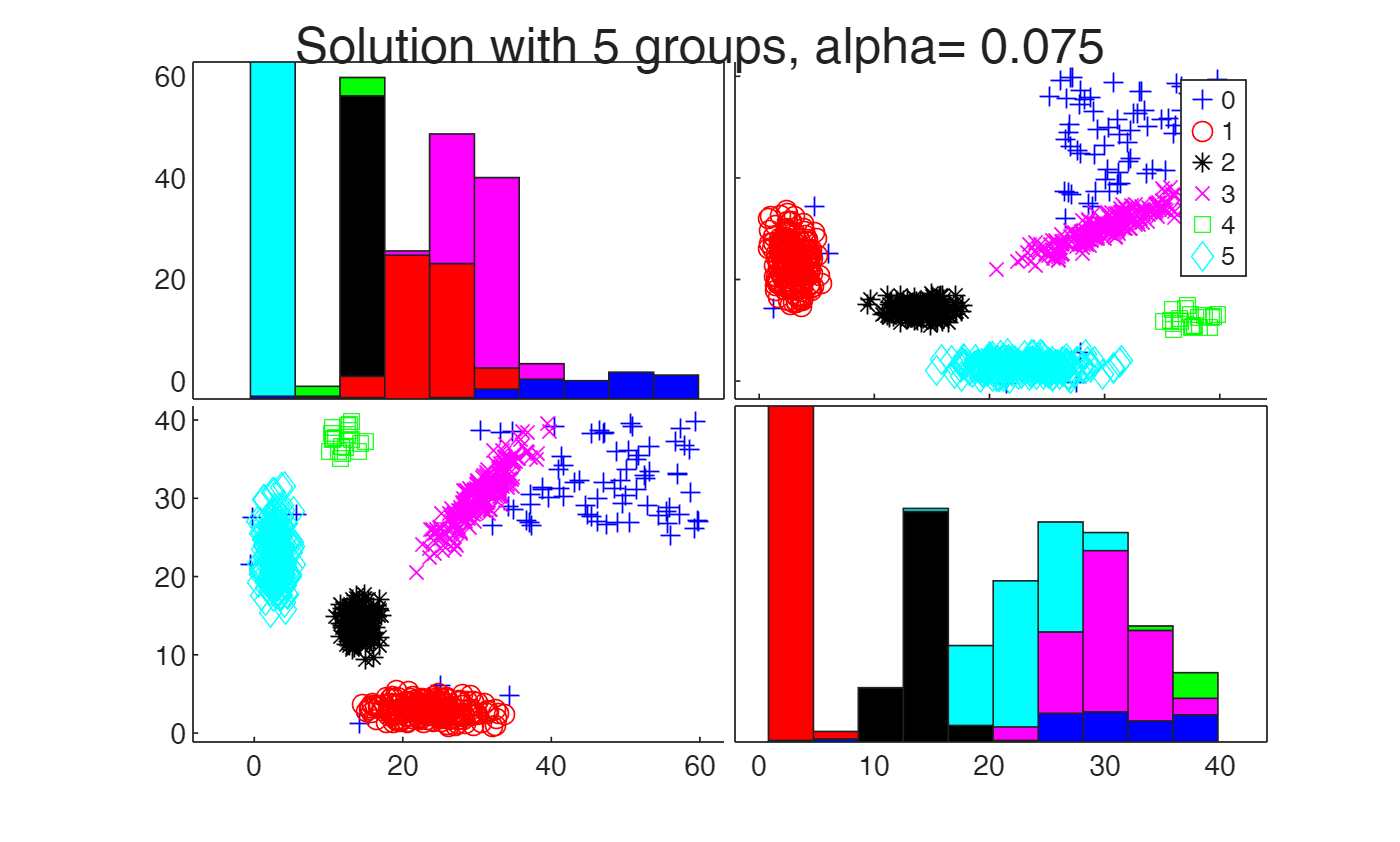

In [7]:

 for j=Sol(:,2)'
    solj=Sol(:,2)==j;
    spmplot(Y,'group',SolIdx(:,solj) ,'tag',['pl' num2str(j)]);
    sgtitle(['Solution with ' num2str(Sol(solj,2)) ' groups, alpha= ' num2str(Sol(solj,3))])
 end

<center>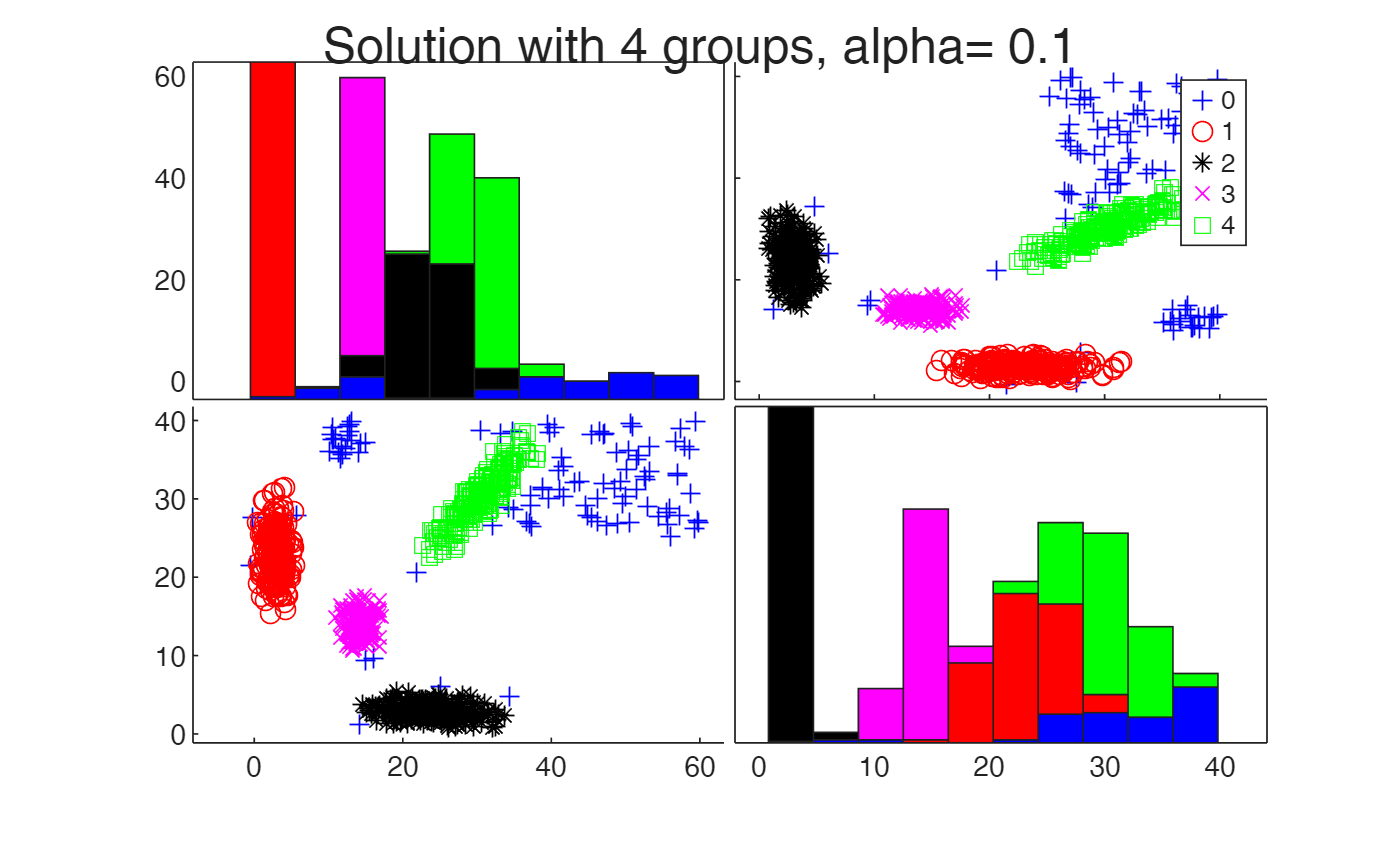</center>



